In [2]:
# External packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime 


# Internal packages
import sys
sys.path.append('../../Time_Series_Forecasting/TS_helpers/')
from dates_kaggle1min import make_all_time_indexes, make_integer_time_index

In [13]:
data = pd.read_csv('../../Data/Coins/BTC_USD/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')
print(data.shape)
data.head()

(3778817, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# data['time_exchange'] = data['Timestamp'].apply(lambda x : datetime.datetime.utcfromtimestamp(int(x))).astype(str)
# data.set_index('time_exchange', inplace=True)
# data = make_all_time_indexes(data.reset_index())

cycle year
cycle month
cycle day
cycle hour
cycle minute
bin year
bin month
bin day
bin hour
bin minute


In [16]:
# data.set_index('Timestamp').to_csv('../../Data/Coins/BTC_USD/bitcoin-historical-data/wdi_bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [25]:
# get date from unix timestamp
data['time_exchange'] = data['Timestamp'].apply(lambda x : datetime.datetime.utcfromtimestamp(int(x)))
# make the time indexes as standard
# data = make_all_time_indexes(data)

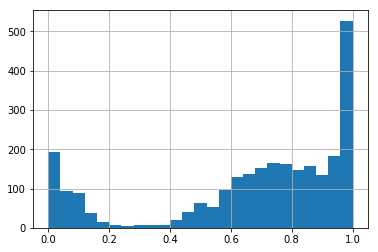

In [37]:
data.groupby('time_month')['Weighted_Price'].agg(lambda x: sum(pd.notna(x))/len(x) ).hist(bins=25)

In [ ]:
plt.bar(data[:80000].index, data[:80000][['Open']].values)

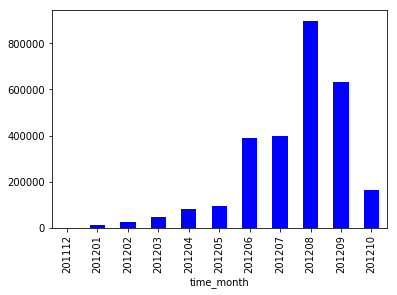

In [53]:
data[:400000].groupby('time_month')['Volume_(Currency)'].sum().plot.bar(color='b')

In [18]:
data.index.nunique() == data.shape[0]

True

In [123]:
# Daily time series

data['Weighted_PriceXVol'] = data['Weighted_Price'] * data['Volume_(Currency)']
daily_weighted_price = data.groupby('time_month')['Weighted_PriceXVol'].sum()/(data.groupby('time_month')['Volume_(Currency)'].sum())
daily_max = data.groupby('time_day')['High'].max()


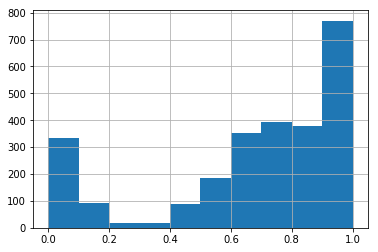

In [97]:
data.groupby('time_day')[['Close', 'Open']].agg(lambda x : sum(pd.notna(x))/len(x) ).hist()

In [7]:
# first_day = str(daily_weighted_price.index[0])
# first_day[:4] + '/' + first_day[4:6] + '/00'
# days = pd.date_range(first_day, periods=len(daily_weighted_price), freq='M')

# days
# # plt.plot(days, daily_weighted_price, 'r')
# # plt.plot(days, data.groupby('time_month')['Volume_(Currency)'].sum(), 'b')
# # plt.title('Tesla Stock Price')
# # plt.ylabel('Price ($)');

NameError: name 'days' is not defined

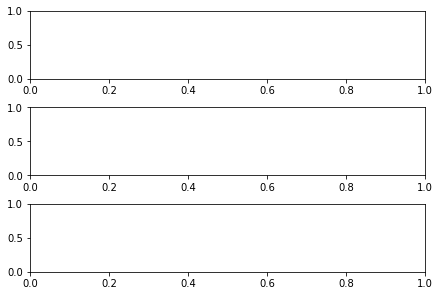

In [3]:
fig, axs = plt.subplots(3, 1, constrained_layout=True)


axs[0].plot(days[k:k+l], daily_weighted_price.apply[k:k+l](lambda x: (x)), 'g')
axs[1].plot(days[k:k+l], data.groupby('time_month')['Volume_(Currency)'].count()[k:k+l], 'black')
axs[2].plot(days[k:k+l], data.groupby('time_month')['Volume_(Currency)'].count()[k:k+l], 'black')

# axs[1].fill(days[0], days[-1], )


In [2]:
import pandas as pd
df_trade = pd.read_csv('../../Data/Coins/BTC_USD/Trade_Data/BITSTAMP_TRADE_SPOTBTC_cum.csv' , index_col='time_exchange')

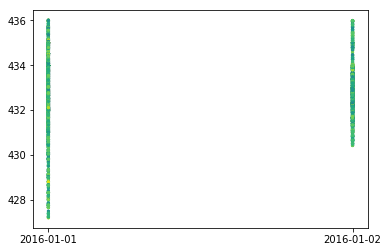

In [14]:
from matplotlib.colors import Colormap as cmap
from matplotlib import pyplot as plt
import numpy as np
cm = cmap('Greys')
a=0
b=5000
# ( df_trade[:2000]['size']/df_trade[:2000]['size'].max() )
# , c=0.1*(df_trade[:2000]['size']/df_trade[:2000]['size'].max() ), cmap=cm
plt.scatter(df_trade.reset_index()[a:a+b]['date'].astype(datetime.date), df_trade[a:a+b]['price'], s=5, c=(df_trade[a:a+b]['size'].apply(np.log)) )



In [19]:
data.head()

,time_exchange,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,hour,minute,time_year,time_month,time_day,time_hour,time_minute,date
0,2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,7,52,2011,201112,20111231,2011123107,201112310752,2011-12-31
1,2011-12-31 07:53:00,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,7,53,2011,201112,20111231,2011123107,201112310753,2011-12-31
2,2011-12-31 07:54:00,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,7,54,2011,201112,20111231,2011123107,201112310754,2011-12-31
3,2011-12-31 07:55:00,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,7,55,2011,201112,20111231,2011123107,201112310755,2011-12-31
4,2011-12-31 07:56:00,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,7,56,2011,201112,20111231,2011123107,201112310756,2011-12-31


In [46]:
import matplotlib.pyplot as plt

k=50
volume= data.groupby('date')['Volume_(BTC)'].sum()[:k]
count= data.groupby('date')['Volume_(BTC)'].count()[:k]
price=data.groupby('date')['Weighted_Price'].mean()[:k]
returns =(data.groupby('date')['Close'].mean().apply(np.log) - data.groupby('date')['Close'].mean().apply(np.log).shift())[:k]




In [ ]:
plt.subplots()

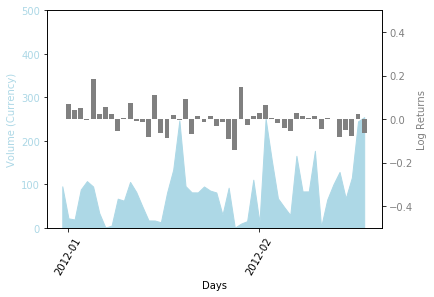

In [64]:
fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index
data1 = volume.values
data2 = (returns.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=60)
ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.bar(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
ax2.set_ylim(-0.5, 0.5)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [60]:
# plt.show()

In [34]:
[[x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01']]

[[datetime.date(2012, 1, 1),
  datetime.date(2012, 2, 1),
  datetime.date(2012, 3, 1),
  datetime.date(2012, 4, 1),
  datetime.date(2012, 5, 1),
  datetime.date(2012, 6, 1),
  datetime.date(2012, 7, 1),
  datetime.date(2012, 8, 1),
  datetime.date(2012, 9, 1),
  datetime.date(2012, 10, 1),
  datetime.date(2012, 11, 1),
  datetime.date(2012, 12, 1)],
 ['2012-01',
  '2012-02',
  '2012-03',
  '2012-04',
  '2012-05',
  '2012-06',
  '2012-07',
  '2012-08',
  '2012-09',
  '2012-10',
  '2012-11',
  '2012-12']]